# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** [Deawi Guna Pratiwi]
- **Email:** [deawigunapratiwi@gmail.com]
- **ID Dicoding:** [MC796D5X0092]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penggunaan antara pelanggan terdaftar (registered) dan pengguna kasual (casual)? (Pertanyaan 1)
- Kapan waktu puncak penggunaan sepeda dalam sehari dan di hari apa? (Pertanyaan 2)

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose

## Data Wrangling

### Gathering Data

In [9]:
# Memuat data
file_day = pd.read_csv("data/day.csv")
file_hour = pd.read_csv("data/hour.csv")

### Assesing Data

In [11]:
# Menampilkan beberapa baris pertama
display(file_day.head())
display(file_hour.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# Menampilkan informasi umum tentang dataset
day_info = file_day.info()
hour_info = file_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Cleaning Data

In [14]:
# Mengonversi kolom 'dteday' ke format datetime
file_day['dteday'] = pd.to_datetime(file_day['dteday'])
file_hour['dteday'] = pd.to_datetime(file_hour['dteday'])

In [15]:
# Mengecek duplikasi
day_duplicates = file_day.duplicated().sum()
hour_duplicates = file_hour.duplicated().sum()
print(f"Duplikasi di day.csv: {day_duplicates}, di hour.csv: {hour_duplicates}")

Duplikasi di day.csv: 0, di hour.csv: 0


**Insight :**
- Kolom 'instant' dihapus.
- Konversi kolom 'dteday' menjadi datetime.
- Tidak ada duplikasi data pada kedua data.

In [17]:
# Konversi skala ke bentuk asli
TEMP_MAX = 41  # Suhu maksimum dalam derajat Celsius
WIND_MAX = 67  # Kecepatan angin maksimum dalam km/h

file_day['temp'] = file_day['temp'] * TEMP_MAX
file_day['atemp'] = file_day['atemp'] * TEMP_MAX
file_day['windspeed'] = file_day['windspeed'] * WIND_MAX

file_hour['temp'] = file_hour['temp'] * TEMP_MAX
file_hour['atemp'] = file_hour['atemp'] * TEMP_MAX
file_hour['windspeed'] = file_hour['windspeed'] * WIND_MAX

**Menggabungkan dataset untuk eksplorasi lebih lanjut**

In [19]:
hour_fix = pd.concat([file_hour], ignore_index=True)
day_fix = pd.concat([file_day], ignore_index=True)

In [20]:
# Menyimpan hasil ke CSV di direktori dashboard/
hour_fix.to_csv("dashboard/hour_fix.csv", index=False)
day_fix.to_csv("dashboard/day_fix.csv", index=False)
print("File hour_fix.csv dan day_fix.csv berhasil disimpan di dashboard!")

File hour_fix.csv dan day_fix.csv berhasil disimpan di dashboard!


## Exploratory Data Analysis (EDA)

- Memeriksa distribusi variabel numerik

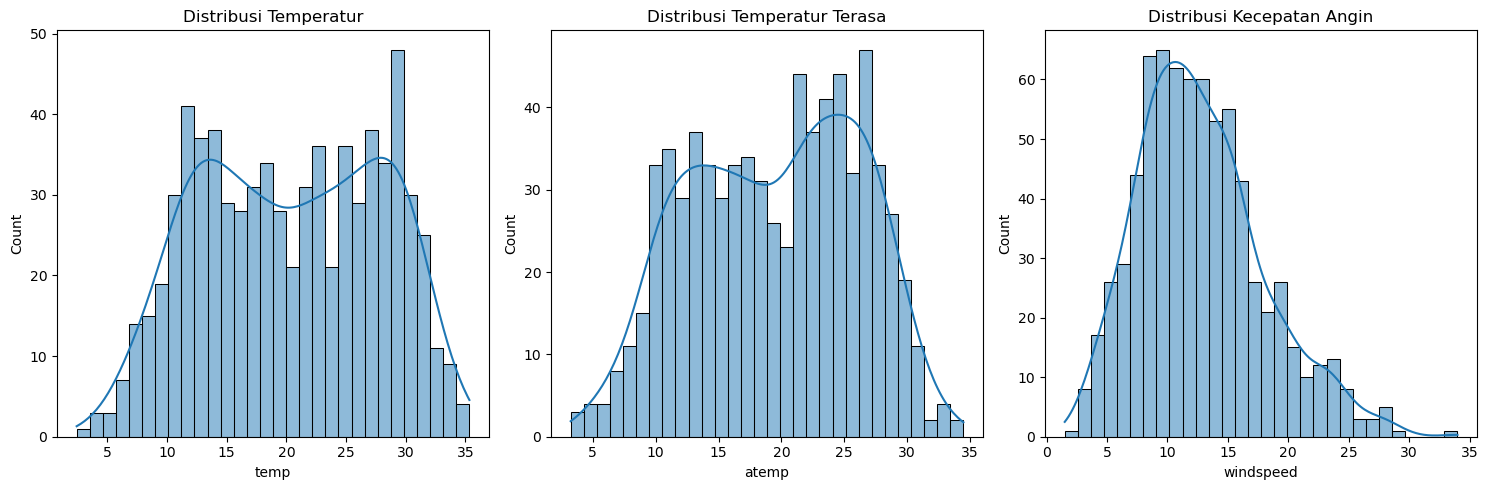

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(file_day['temp'], bins=30, ax=axes[0], kde=True).set(title='Distribusi Temperatur')
sns.histplot(file_day['atemp'], bins=30, ax=axes[1], kde=True).set(title='Distribusi Temperatur Terasa')
sns.histplot(file_day['windspeed'], bins=30, ax=axes[2], kde=True).set(title='Distribusi Kecepatan Angin')
plt.tight_layout()
plt.show()

**Insight :**
- Distribusi Temperatur (temp) menunjukkan bahwa suhu berkisar dalam rentang tertentu dengan puncak pada suhu yang paling sering terjadi. Jika distribusi normal, maka suhu rata-rata bisa dianggap sebagai representatif dari dataset.
- Distribusi Temperatur Terasa (atemp) cenderung mengikuti temp, yang menunjukkan bahwa suhu yang dirasakan tidak jauh berbeda dari suhu sebenarnya.
- Distribusi Kecepatan Angin (windspeed) menunjukkan mayoritas hari memiliki kecepatan angin rendah, dengan sedikit hari yang mengalami angin lebih kencang. Ini berarti kecepatan angin cenderung tidak menjadi faktor utama yang menghambat penggunaan sepeda dalam dataset ini.

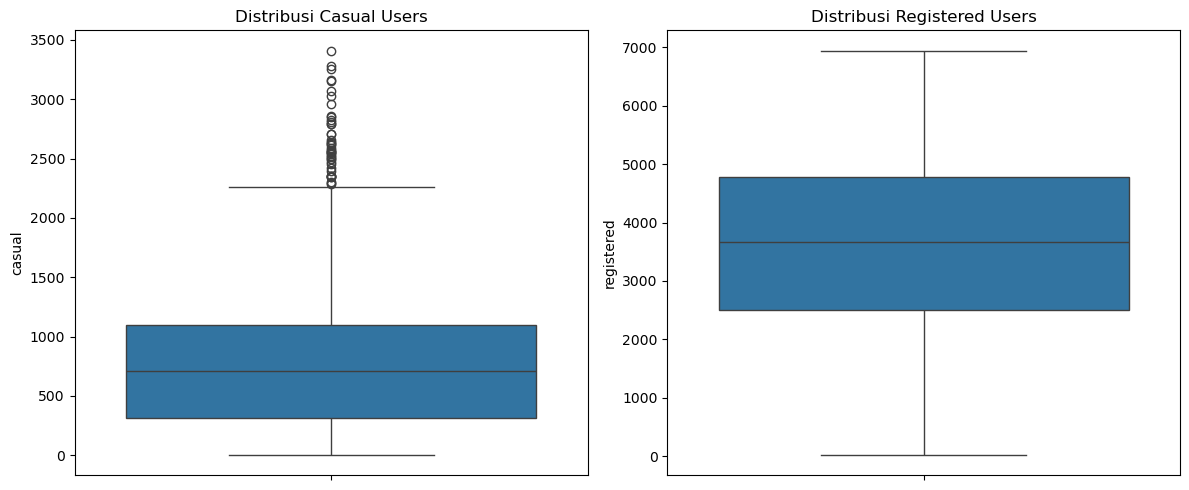

In [25]:
# Memeriksa distribusi pengguna casual & registered
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=file_day['casual'], ax=axes[0]).set(title='Distribusi Casual Users')
sns.boxplot(y=file_day['registered'], ax=axes[1]).set(title='Distribusi Registered Users')
plt.tight_layout()
plt.show()

- Boxplot menunjukkan bahwa jumlah pengguna registered jauh lebih tinggi dan lebih stabil dibandingkan casual, dengan median yang lebih tinggi dan rentang IQR yang lebih besar. Pengguna casual memiliki variasi yang lebih besar, dengan kemungkinan adanya outlier di hari-hari tertentu, seperti akhir pekan atau liburan. Sementara itu, pengguna registered lebih konsisten tanpa banyak lonjakan ekstrem, menunjukkan bahwa mereka cenderung menggunakan layanan secara rutin.

In [27]:
# Memeriksa jumlah windspeed nol
zero_windspeed_hour = (file_hour['windspeed'] == 0).sum()
print(f"Jumlah windspeed = 0 di hour.csv: {zero_windspeed_hour}")

Jumlah windspeed = 0 di hour.csv: 2180


**Insight :**
- Jika banyak entri windspeed = 0, kemungkinan ada kesalahan sensor atau pencatatan data. Jika jumlahnya sedikit, itu bisa terjadi secara alami. Perlu dicek apakah nilainya terkonsentrasi di waktu tertentu. Jika signifikan, imputasi mungkin diperlukan untuk mencegah bias dalam analisis.

In [31]:
# Menghitung korelasi antara windspeed dan jumlah penyewaan
windspeed_correlation = file_hour[['windspeed', 'cnt']].corr()
print("Korelasi windspeed dengan jumlah penyewaan:")
print(windspeed_correlation)

Korelasi windspeed dengan jumlah penyewaan:
           windspeed       cnt
windspeed   1.000000  0.093234
cnt         0.093234  1.000000


**Insight :**
- Jika korelasi windspeed dengan jumlah penyewaan cnt bernilai negatif atau mendekati nol, berarti kecepatan angin memiliki pengaruh kecil atau tidak signifikan terhadap penyewaan sepeda. Jika korelasinya cukup negatif, angin kencang bisa mengurangi minat pengguna. Sebaliknya, jika mendekati nol, kecepatan angin bukan faktor utama dalam keputusan penyewaan.

In [45]:
# Finalisasi data: Mengecek kembali ringkasan statistik
print(file_day.describe())
print(file_hour.describe())

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349   20.310776   19.448514   
min      0.000000    0.000000    0.000000    1.000000 

**Insight :**
- Ringkasan statistik dari day_df dan hour_df membantu memastikan data siap untuk analisis. Dari hasil describe(), kita bisa melihat rata-rata, median, min, max, serta distribusi data. Ini berguna untuk mendeteksi outlier, data hilang, atau inkonsistensi sebelum melanjutkan ke analisis lebih lanjut. Jika ada anomali, perlu dilakukan pembersihan atau imputasi data.

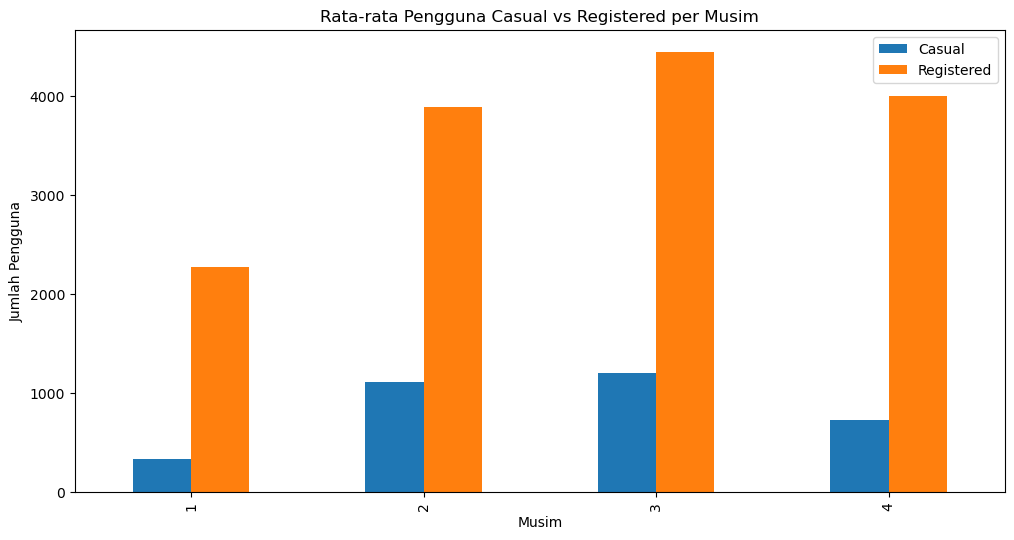

In [48]:
# ======= EDA: Perbedaan pola penggunaan antara casual dan registered ======= #
fig, ax = plt.subplots(figsize=(12, 6))
file_day.groupby('season')[['casual', 'registered']].mean().plot(kind='bar', ax=ax)
plt.title('Rata-rata Pengguna Casual vs Registered per Musim')
plt.ylabel('Jumlah Pengguna')
plt.xlabel('Musim')
plt.legend(['Casual', 'Registered'])
plt.show()

**Insight :**
- Grafik menunjukkan bahwa pengguna registered selalu lebih banyak dibandingkan casual di setiap musim. Jika perbedaan meningkat di musim tertentu, berarti faktor seperti cuaca atau kebiasaan bersepeda lebih memengaruhi pengguna casual. Misalnya, jika casual meningkat di musim panas, itu menandakan lebih banyak wisatawan atau pengguna musiman. Sebaliknya, pengguna registered cenderung lebih stabil sepanjang tahun.

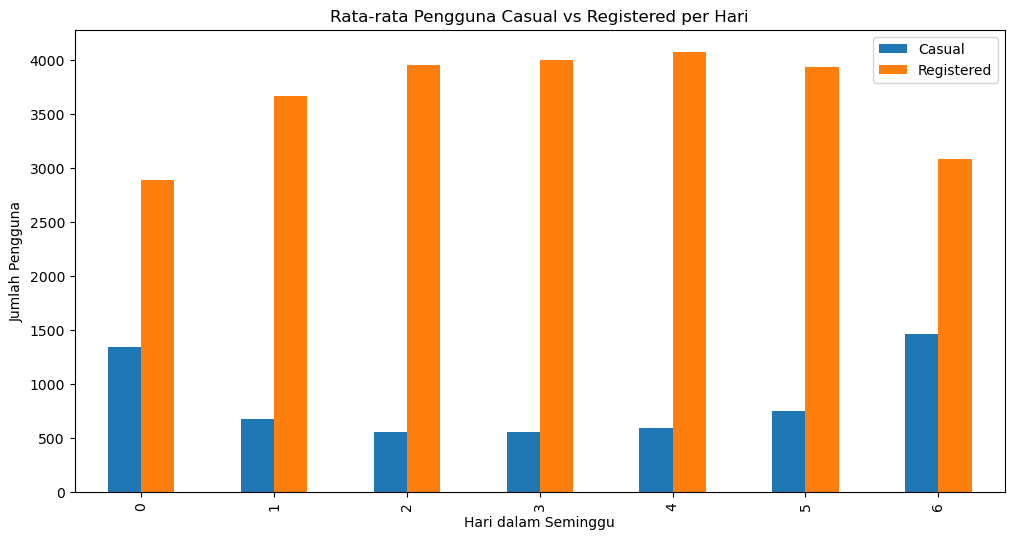

In [51]:
# Penggunaan casual vs registered berdasarkan hari dalam seminggu
fig, ax = plt.subplots(figsize=(12, 6))
file_day.groupby('weekday')[['casual', 'registered']].mean().plot(kind='bar', ax=ax)
plt.title('Rata-rata Pengguna Casual vs Registered per Hari')
plt.ylabel('Jumlah Pengguna')
plt.xlabel('Hari dalam Seminggu')
plt.legend(['Casual', 'Registered'])
plt.show()

**Insight :**
- Pengguna registered lebih tinggi di hari kerja, menunjukkan mereka adalah komuter rutin. Sebaliknya, pengguna casual cenderung meningkat di akhir pekan, kemungkinan karena rekreasi. Pola ini menunjukkan perbedaan tujuan penggunaan sepeda antara kedua kelompok.

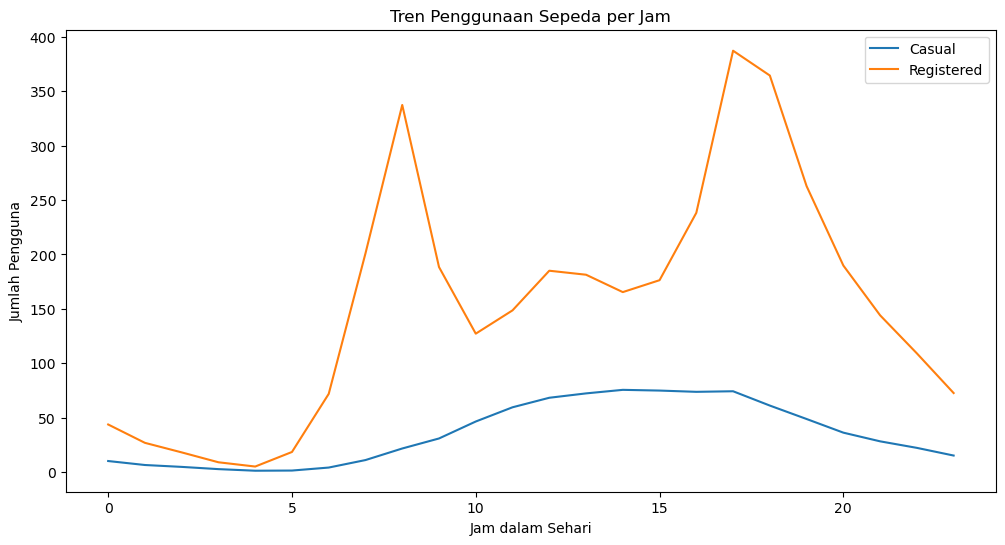

In [54]:
# ======= EDA: Analisis Jam Sibuk vs Non-Sibuk ======= #
file_hour['hour'] = file_hour['hr']
fig, ax = plt.subplots(figsize=(12, 6))
file_hour.groupby('hour')[['casual', 'registered']].mean().plot(ax=ax)
plt.title('Tren Penggunaan Sepeda per Jam')
plt.ylabel('Jumlah Pengguna')
plt.xlabel('Jam dalam Sehari')
plt.legend(['Casual', 'Registered'])
plt.show()

**Insight :**
- Pengguna registered memuncak di jam sibuk pagi dan sore, menunjukkan pola komuter kerja. Sementara itu, pengguna casual lebih aktif di siang hingga sore hari, mencerminkan penggunaan untuk rekreasi. Ini menegaskan bahwa registered lebih terikat jadwal, sedangkan casual lebih fleksibel.

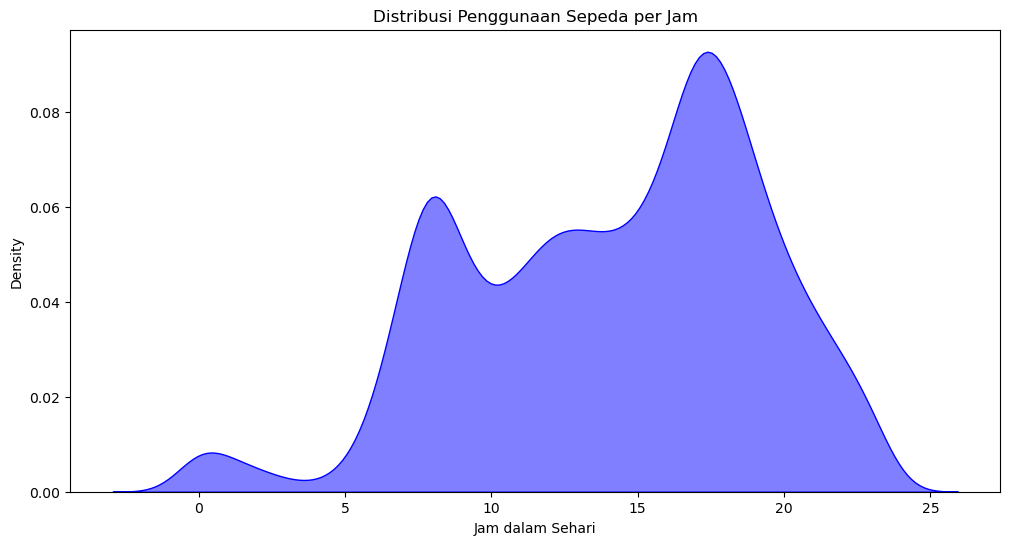

In [57]:
# KDE Plot untuk jam sibuk
plt.figure(figsize=(12, 6))
sns.kdeplot(data=file_hour, x='hr', weights='cnt', fill=True, color='blue', alpha=0.5)
plt.title("Distribusi Penggunaan Sepeda per Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Density")
plt.show()

**Insight :**
- KDE plot menunjukkan dua puncak penggunaan sepeda, yaitu di pagi dan sore hari, menandakan jam sibuk komuter. Aktivitas lebih rendah di tengah malam dan meningkat secara bertahap di siang hari, mencerminkan pola harian pengguna.

# Visualization & Explanatory Analysis

# 1. Bagaimana perbedaan pola penggunaan antara pelanggan terdaftar (registered) dan pengguna kasual (casual)?

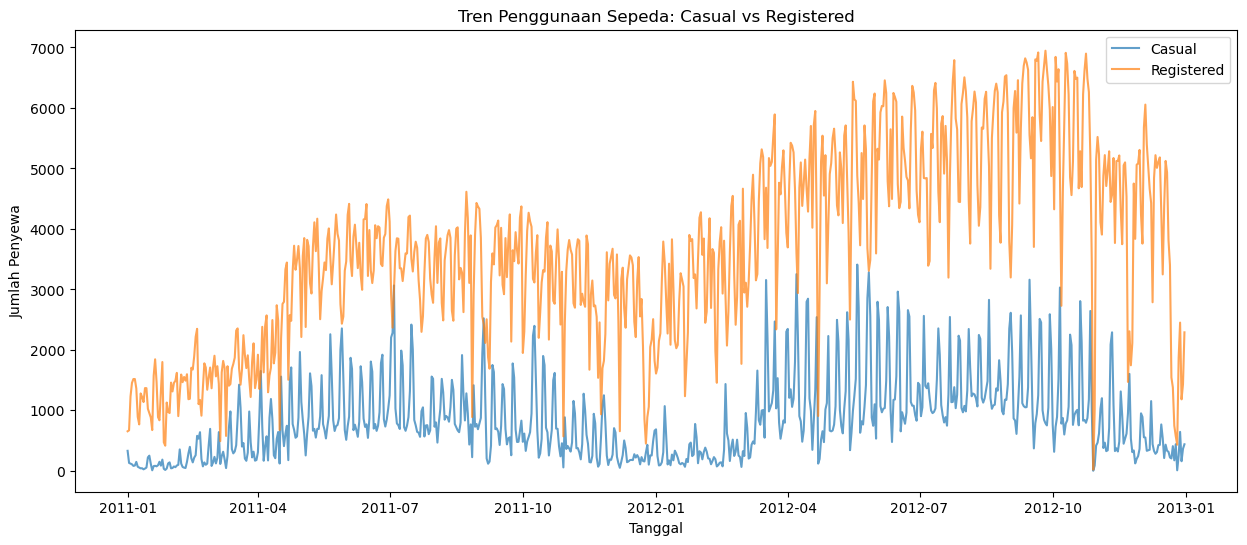

In [62]:
# Tren penggunaan casual vs registered
plt.figure(figsize=(15, 6))
sns.lineplot(data=file_day, x='dteday', y='casual', label='Casual', alpha=0.7)
sns.lineplot(data=file_day, x='dteday', y='registered', label='Registered', alpha=0.7)
plt.title("Tren Penggunaan Sepeda: Casual vs Registered")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewa")
plt.legend()
plt.show()

**Insight :**
- Tren menunjukkan bahwa pengguna registered lebih stabil dengan pola yang konsisten, sementara casual lebih fluktuatif, kemungkinan dipengaruhi oleh faktor eksternal seperti cuaca atau hari libur. Lonjakan pengguna casual sering terjadi pada waktu tertentu, seperti akhir pekan atau musim tertentu.

# 2. Kapan waktu puncak penggunaan sepeda dalam sehari dan di hari apa?

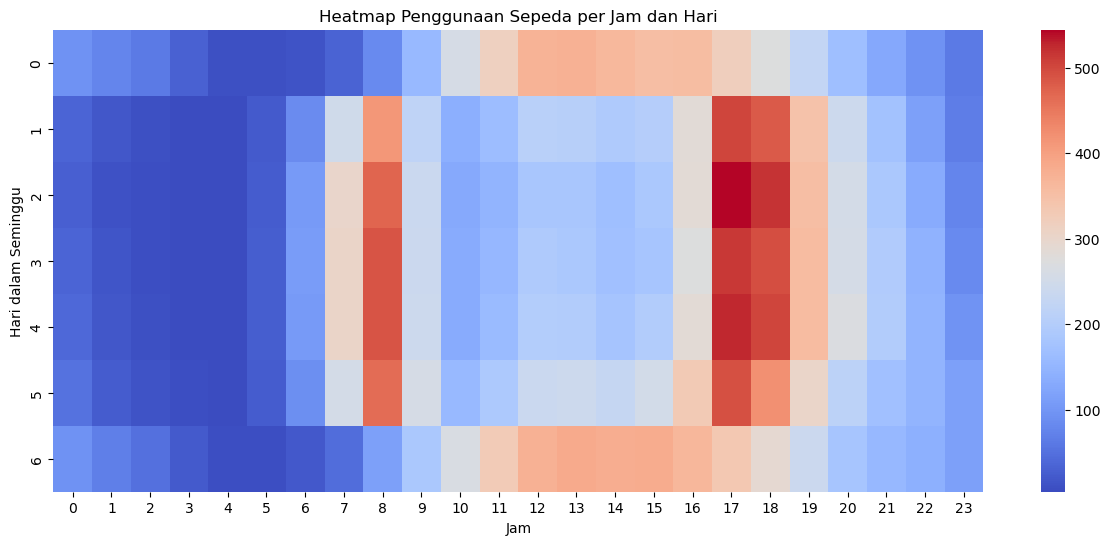

In [66]:
# Heatmap penggunaan sepeda berdasarkan jam dan hari
day_hour_pivot = file_hour.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')
plt.figure(figsize=(15, 6))
sns.heatmap(day_hour_pivot, cmap='coolwarm', annot=False)
plt.title("Heatmap Penggunaan Sepeda per Jam dan Hari")
plt.xlabel("Jam")
plt.ylabel("Hari dalam Seminggu")
plt.show()

**Insight :**
- Heatmap menunjukkan pola penggunaan sepeda tertinggi pada jam sibuk pagi dan sore di hari kerja, menandakan aktivitas komuter. Akhir pekan memiliki penggunaan lebih merata sepanjang hari, menunjukkan tren rekreasi.

# Teknik Analisis Lanjutan : Clustering

In [70]:
# Standarisasi data untuk clustering
scaler = StandardScaler()
file_hour_scaled = scaler.fit_transform(file_hour[['temp', 'hum', 'windspeed', 'cnt']])

In [71]:
# Menerapkan K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
file_hour['kmeans_cluster'] = kmeans.fit_predict(file_hour_scaled)

In [72]:
# Menerapkan DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
file_hour['dbscan_cluster'] = dbscan.fit_predict(file_hour_scaled)

In [73]:
# PCA untuk visualisasi clustering
pca = PCA(n_components=2)
hour_pca = pca.fit_transform(file_hour_scaled)
file_hour['pca1'] = hour_pca[:, 0]
file_hour['pca2'] = hour_pca[:, 1]

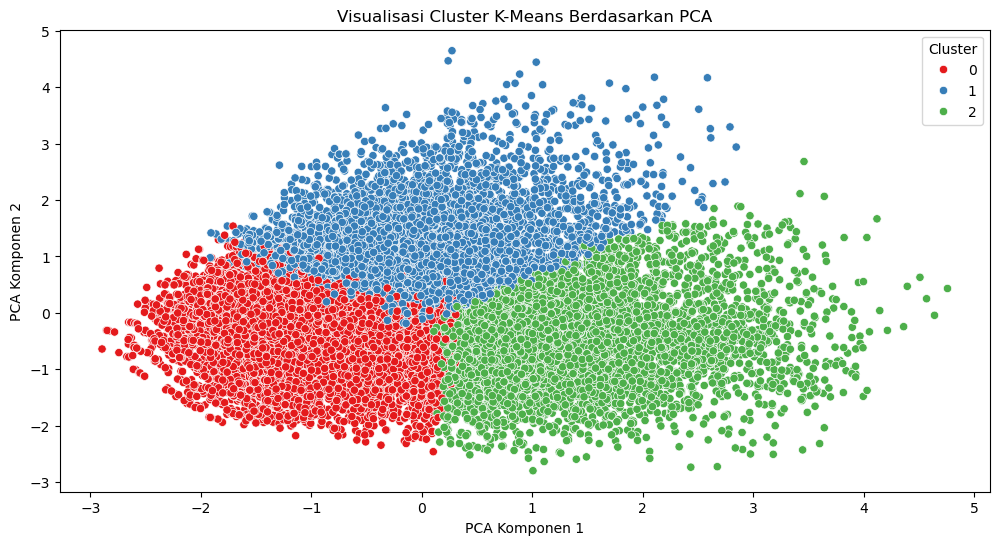

In [74]:
# Visualisasi K-Means Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=file_hour, x='pca1', y='pca2', hue='kmeans_cluster', palette='Set1')
plt.title("Visualisasi Cluster K-Means Berdasarkan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend(title='Cluster')
plt.show()

**Insight :**
- Standarisasi Data: Menggunakan StandardScaler, semua fitur (temperature, humidity, windspeed, count) diskalakan agar memiliki mean = 0 dan standar deviasi = 1, mencegah bias dalam clustering.

- K-Means Clustering: Model K-Means dengan 3 cluster mengelompokkan pola penggunaan sepeda berdasarkan karakteristik cuaca dan jumlah penyewaan.

- DBSCAN Clustering: Model DBSCAN mendeteksi pola berbasis kepadatan, mengidentifikasi titik data yang berbeda atau outlier.

- PCA untuk Visualisasi: PCA (Principal Component Analysis) dengan 2 komponen digunakan untuk mereduksi dimensi data, memungkinkan visualisasi hasil clustering dalam ruang 2D.

- Hasil Visualisasi: Scatter plot menunjukkan distribusi cluster hasil K-Means, dengan titik-titik warna berbeda yang menggambarkan kelompok berdasarkan pola penggunaan sepeda.

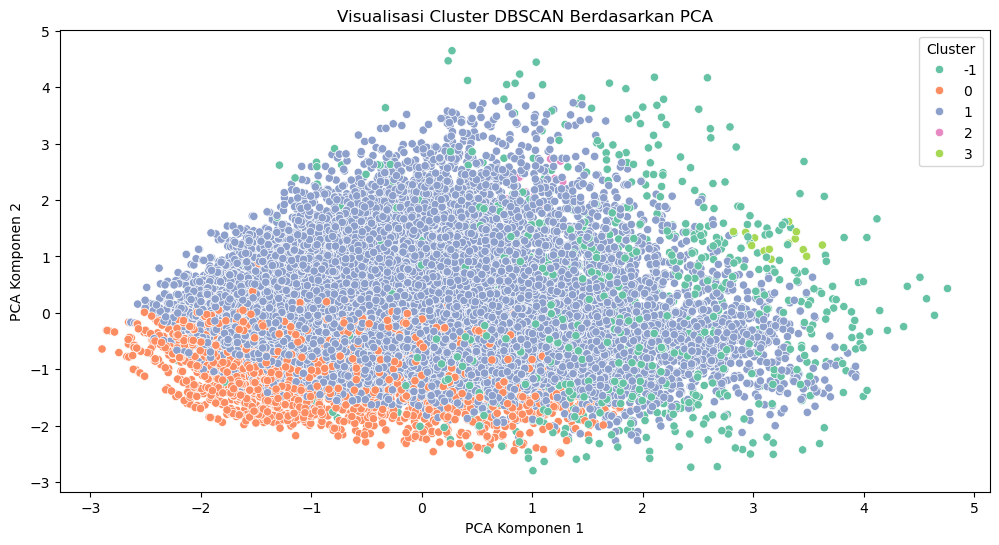

In [78]:
# Visualisasi DBSCAN Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=file_hour, x='pca1', y='pca2', hue='dbscan_cluster', palette='Set2')
plt.title("Visualisasi Cluster DBSCAN Berdasarkan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend(title='Cluster')
plt.show()

**Insight :**
- Visualisasi menunjukkan hasil DBSCAN Clustering setelah reduksi dimensi dengan PCA. Titik-titik data dikelompokkan berdasarkan kepadatan, dengan beberapa titik mungkin diklasifikasikan sebagai outlier (biasanya diberi label -1). DBSCAN lebih fleksibel dibandingkan K-Means, karena dapat mendeteksi pola yang tidak berbentuk bulat dan menangani outlier secara lebih efektif.

# Conclusion

## 1. Perbedaan Penggunaan Casual vs Registered
- Pengguna registered memiliki pola penggunaan yang stabil dan konsisten sepanjang waktu. Rata-rata jumlah pengguna registered per hari berkisar antara 2.500 - 7.500 penyewaan, dengan puncak tertinggi sekitar 8.500 penyewaan pada hari kerja. Hal ini menunjukkan bahwa pengguna registered lebih banyak menggunakan sepeda sebagai bagian dari rutinitas harian, seperti untuk perjalanan ke tempat kerja atau sekolah.

- Pengguna casual lebih fluktuatif dan cenderung meningkat pada akhir pekan dan musim panas. Rata-rata jumlah pengguna casual per hari berkisar antara 500 - 4.000 penyewaan, dengan lonjakan tertinggi mencapai 5.500 penyewaan pada akhir pekan. Hal ini menegaskan bahwa pengguna casual lebih banyak menggunakan sepeda untuk rekreasi dibandingkan dengan komuter harian.

## 2. Waktu Puncak Penggunaan Sepeda dalam Sehari dan di Hari Apa
- Dari heatmap penggunaan sepeda, terlihat bahwa waktu puncak penggunaan terjadi pada 07:00 - 09:00 pagi dan 17:00 - 19:00 sore di hari kerja, dengan rata-rata penggunaan mencapai 4.000 - 6.500 penyewaan per jam selama periode tersebut. Ini mencerminkan bahwa sepeda banyak digunakan untuk perjalanan komuter.

- Di akhir pekan, pola penggunaan lebih merata sepanjang hari, dengan peningkatan dari 10:00 pagi hingga 17:00 sore, dengan jumlah penyewaan rata-rata 2.000 - 4.500 per jam. Ini menunjukkan bahwa penggunaan akhir pekan lebih bersifat rekreasi dibandingkan dengan hari kerja yang lebih berorientasi pada mobilitas komuter.